# PCA y K-means con imágenes de perros

Rodrigo Chang

Carné: 19000625

In [94]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Carga de datos

In [96]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle=True)

## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [97]:
features.shape

(10222, 2048)

In [98]:
lookupTable, indexed_labels = np.unique(labels, return_inverse=True)
indexed_labels

array([19, 37, 85, ...,  3, 75, 28])

In [99]:
lookupTable

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [100]:
len(lookupTable)

120

## Normalizar las features

In [101]:
def normalizarFeatures(features):
    media = features.mean(axis=0).reshape(1, features.shape[1])
    sd = features.std(axis=0).reshape(1, features.shape[1])
    
    f = (features - media) / sd
    return f

normFeatures = normalizarFeatures(features)
normFeatures.shape

(10222, 2048)

In [102]:
normFeatures.mean(axis=0)

array([ 2.6058956e-06,  2.1299652e-06,  8.0130985e-07, ...,
       -1.1213641e-06,  1.0568133e-06,  1.8761119e-06], dtype=float32)

In [103]:
normFeatures.std(axis=0)

array([1.0000011 , 1.000001  , 0.9999984 , ..., 0.9999993 , 0.99999934,
       0.9999987 ], dtype=float32)

# Aplicación de PCA

In [104]:
pca = PCA(n_components = 2)
pca.fit(normFeatures)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [105]:
print(pca.explained_variance_ratio_)

[0.04504334 0.02990814]


In [106]:
#### PCA a 2 dimensiones ######
X2D = pca.transform(normFeatures) #new features matrix
X2D

array([[ -2.9848003,   5.013451 ],
       [  9.408894 ,  -5.2987857],
       [ 18.952316 ,  18.11392  ],
       ...,
       [  9.331049 ,  -1.8335247],
       [ 16.002792 ,   3.0148878],
       [ 24.496202 , -15.417867 ]], dtype=float32)

In [107]:
print(X2D.shape)

(10222, 2)


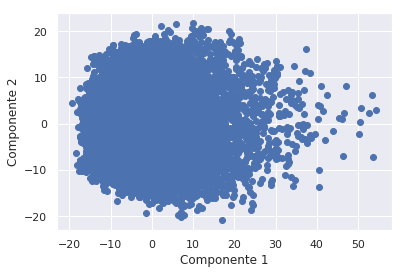

In [108]:
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2');

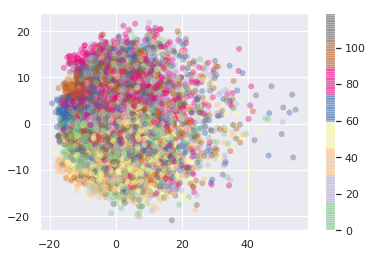

In [109]:
# Gráfica de colores
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=indexed_labels, edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Accent', len(lookupTable)))
plt.colorbar();

## K-means Clustering con Sklearn

[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Come se observa en la gráfica de colores, existen muchos grupos traslapados, y por lo tanto, para este ejercicio de prueba se utilizarán menos clusters que el número de razas de perros

In [110]:
## K-means
kmeans = KMeans(n_clusters=90)
kmeans.fit(X2D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=90, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [111]:
kmeans.labels_

array([50, 11, 23, ..., 33, 54, 73], dtype=int32)

In [112]:
centers = kmeans.cluster_centers_ ## clustes de kmeans
centers

array([[ 3.53583298e+01, -1.95016217e+00],
       [-7.28695011e+00, -1.74370813e+00],
       [ 2.73416972e+00,  1.08465946e+00],
       [-6.53242970e+00,  7.64117670e+00],
       [ 4.24541044e+00, -1.26814032e+01],
       [ 5.84584332e+00,  8.40759659e+00],
       [ 1.62957821e+01, -8.02109337e+00],
       [-7.38975382e+00, -1.22612877e+01],
       [ 1.11398764e+01,  7.31148911e+00],
       [-2.24378633e+00, -6.75968170e+00],
       [-1.17496910e+01,  3.85453701e+00],
       [ 9.38970566e+00, -6.99698162e+00],
       [ 2.68111000e+01,  3.40162683e+00],
       [-2.75513005e+00,  1.03914633e+01],
       [ 6.91621590e+00,  1.46313848e+01],
       [-1.47230530e+01, -8.34889317e+00],
       [-1.78223997e-02, -1.11261630e+00],
       [ 1.28297443e+01, -1.19622078e+01],
       [-1.47288895e+01, -2.15436077e+00],
       [-3.36246300e+00,  2.66339326e+00],
       [-2.49935940e-01,  1.34177895e+01],
       [-5.48120546e+00, -6.86712265e+00],
       [ 7.46883154e+00,  4.44957542e+00],
       [ 1.

In [113]:
kmeans.cluster_centers_.shape

(90, 2)

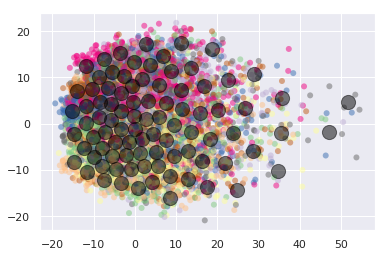

In [114]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=indexed_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', len(lookupTable)))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);